In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv("train.csv")

# Preview the first few rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Extract surname from Name before dropping
df['Last_Name'] = df['Name'].str.split(',').str[0]

# Drop Name and Ticket
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Fill missing Age values with median age by Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
# Fill missing cabin for family members by using family's known cabin
family_cabins = df.groupby('Last_Name')['Cabin'].agg(
    lambda x: x.dropna().iloc[0] if x.notna().any() else np.nan
)

# Fill missing cabins with family cabin if available
df['Cabin'] = df.apply(
    lambda row: family_cabins[row['Last_Name']]
    if pd.isna(row['Cabin'])
    else row['Cabin'],
    axis=1
)

# Replace any still-missing cabins with "Unknown"
df['Cabin'] = df['Cabin'].fillna("Unknown")

In [ ]:
# Format Fare to 2 decimal places
df['Fare'] = df['Fare'].round(2)

In [ ]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Convert data types
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Cabin'] = df['Cabin'].astype(str)

In [ ]:
# Drop temporary Last_Name column
df.drop('Last_Name', axis=1, inplace=True)

In [ ]:
# Save the cleaned dataset
df.to_csv("titanic_cleaned_final.csv", index=False)
print("✅ Cleaned dataset saved as 'titanic_cleaned_final.csv'.")

✅ Cleaned dataset saved as 'titanic_cleaned_final.csv'.


#  - - Data Visualization - -

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("titanic_cleaned_final.csv")

# Preview the few rows
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.25,Unknown,S
1,2,1,1,female,38.0,1,0,71.28,C85,C
2,3,1,3,female,26.0,0,0,7.92,Unknown,S
3,4,1,1,female,35.0,1,0,53.10,C123,S
4,5,0,3,male,35.0,0,0,8.05,B5,S
5,6,0,3,male,24.0,0,0,8.46,Unknown,Q
6,7,0,1,male,54.0,0,0,51.86,E46,S
7,8,0,3,male,2.0,3,1,21.08,Unknown,S
8,9,1,3,female,27.0,0,2,11.13,Unknown,S
9,10,1,2,female,14.0,1,0,30.07,Unknown,C


### Show the relationship between a passenger's ticket class and survival rate

In [ ]:
# Calculate survival rate by Pclass
pclass_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival rate by ticket class (%):")
print(pclass_survival)

Survival rate by ticket class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


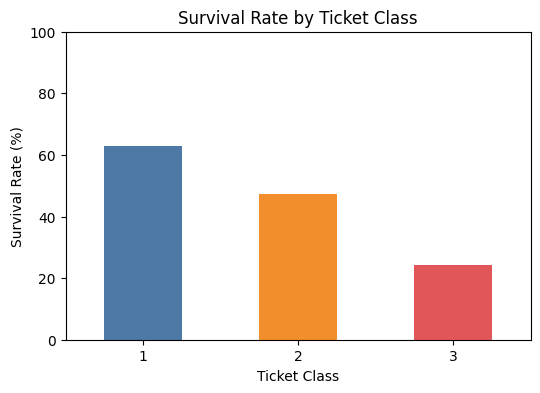

In [ ]:
# Bar plot
plt.figure(figsize=(6,4))
pclass_survival.plot(kind='bar', color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

## Show the relationship between a passenger's sex and survival rate

In [ ]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = (sum(women)/len(women)) * 100

print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


In [ ]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = (sum(men)/len(men)) * 100

print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


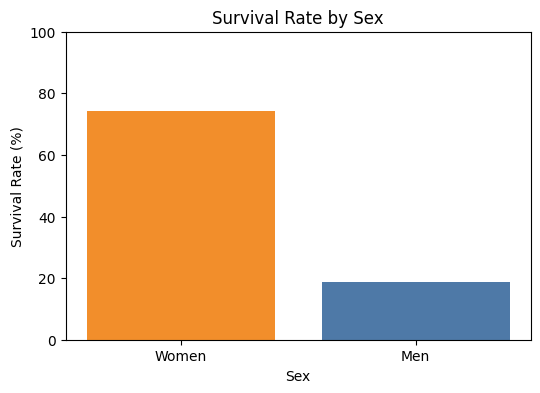

In [ ]:
# Bar plot
sex_rates = {'Women': rate_women, 'Men': rate_men}

plt.figure(figsize=(6,4))
plt.bar(sex_rates.keys(), sex_rates.values(), color=['#f28e2b', '#4e79a7'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

## Show the relationship between a passenger's age and survival rate.

In [ ]:
# We'll bin ages for better visualization
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival rate by age group (%):")
print(age_survival)

Survival rate by age group (%):
AgeGroup
Child          57.352941
Teen           48.888889
Young Adult    31.818182
Adult          42.307692
Senior         35.616438
Name: Survived, dtype: float64


C:\Users\ice\AppData\Local\Temp\ipykernel_10132\2908523763.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


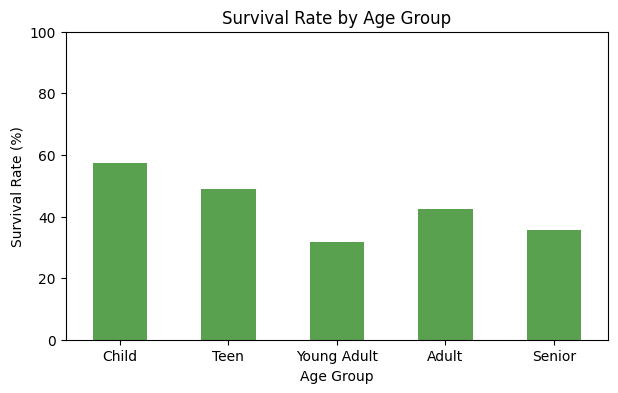

In [ ]:
# Bar plot
plt.figure(figsize=(7,4))
age_survival.plot(kind='bar', color='#59a14f')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

## Display the relationship between the survival rate and passenger's class, sex, and age.

1. Relationship between Pclass and sex.

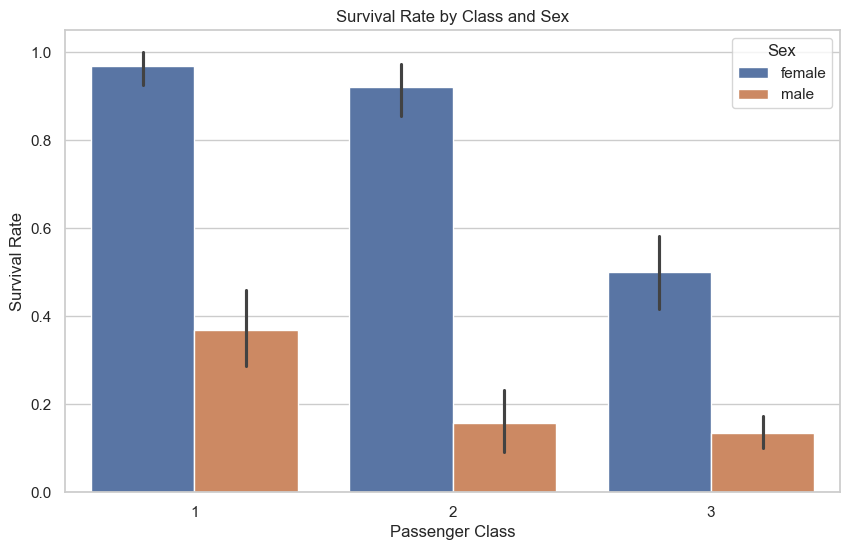

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Class and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')
plt.show()

<small> We can see based on the image that females has a high surival rate in all three classes. </small>

2. Age distribution by Survival.

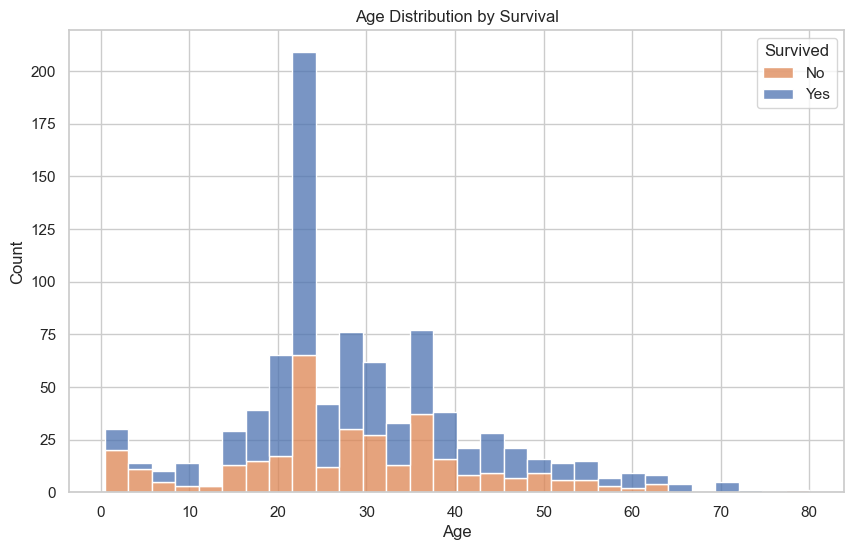

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<small>
The current visualization might be a little confusing and can be mistaken as misleading at first because children supposedly must show greater difference of survival compare to adults (refer to Survival Rate by Age Group). We'll see what are the other factors that results to this. </small>

3. Survival rate by Age, Sex, and Class

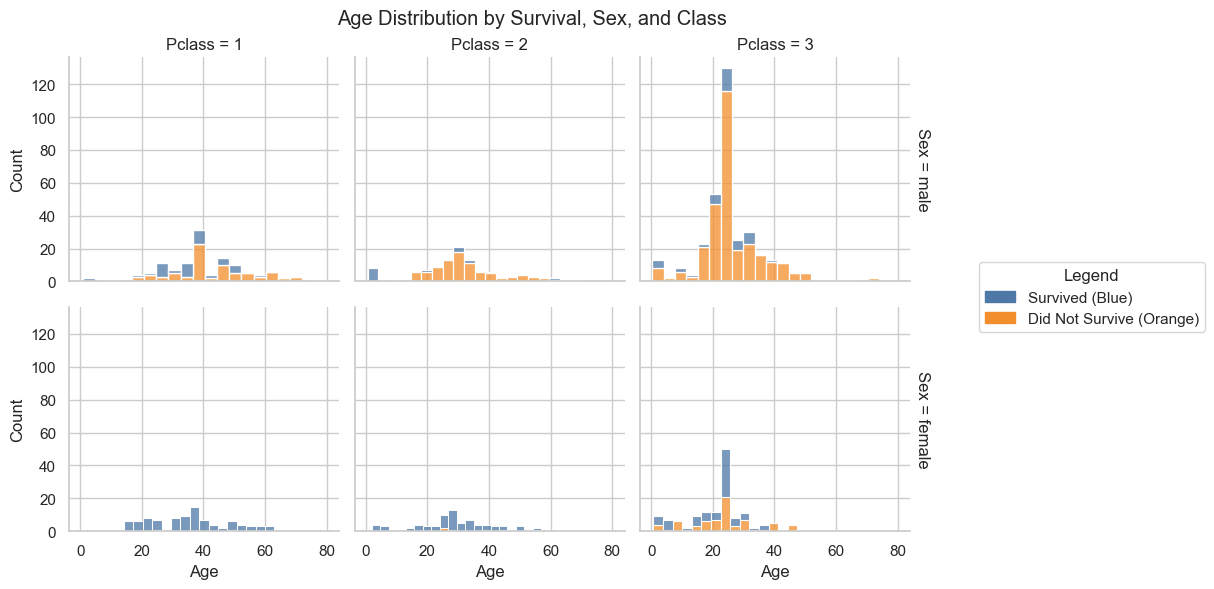

In [ ]:
# Map Survived to string labels for clarity
df['Survived_str'] = df['Survived'].map({1: 'Survived', 0: 'Did Not Survive'})

# Set the hue order and palette explicitly
hue_order = ['Survived', 'Did Not Survive']
palette = {'Survived': '#4e79a7', 'Did Not Survive': '#f28e2b'}

g = sns.FacetGrid(
    df, row='Sex', col='Pclass', margin_titles=True, height=3, aspect=1.2
)
g.map_dataframe(
    sns.histplot,
    x='Age',
    hue='Survived_str',
    multiple='stack',
    bins=20,
    hue_order=hue_order,
    palette=palette
)

# Remove the default legend and add a custom one
for ax in g.axes.flat:
    ax.legend_.remove() if ax.get_legend() else None

# Add a single custom legend to the figure
import matplotlib.patches as mpatches
handles = [
    mpatches.Patch(color='#4e79a7', label='Survived (Blue)'),
    mpatches.Patch(color='#f28e2b', label='Did Not Survive (Orange)')
]
g.fig.legend(
    handles=handles,
    title='Legend',
    loc='center right',
    bbox_to_anchor=(1.13, 0.5)
)

g.set_axis_labels('Age', 'Count')
g.fig.subplots_adjust(top=0.9, right=0.85)
g.fig.suptitle('Age Distribution by Survival, Sex, and Class')
plt.show()

<small> We can see in the graph that a lot of children are from class 3, and unfortunately Pclass was a factor regardless whether you are a child. This is proven based from the higher classes, which has a few children but most of them survived.</small>

Number of passengers and age along with their survival rate

In [ ]:
# Filter for children (AgeGroup == 'Child')
children = df[df['AgeGroup'] == 'Child']

# Compute survival rate for each class
child_class_survival = children.groupby('Pclass')['Survived'].mean() * 100

# Show the result
print("Survival rate of children by class (%):")
print(child_class_survival)

Survival rate of children by class (%):
Pclass
1     75.000000
2    100.000000
3     40.425532
Name: Survived, dtype: float64


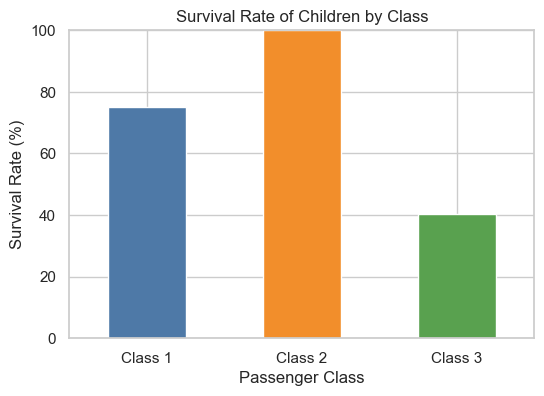

In [ ]:
plt.figure(figsize=(6,4))
child_class_survival.plot(kind='bar', color=['#4e79a7', '#f28e2b', '#59a14f'])
plt.title('Survival Rate of Children by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.xticks([0,1,2], ['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.show()

In [ ]:
# Filter for children (AgeGroup == 'Child')
children = df[df['AgeGroup'] == 'Child']

# Count total children
total_children = len(children)

# Count survivors and non-survivors
survived_children = children['Survived'].sum()
not_survived_children = total_children - survived_children

# Compute overall survival rate
overall_survival_rate = survived_children / total_children * 100

# Print results
print(f"Total children: {total_children}")
print(f"Survived: {survived_children}")
print(f"Did not survive: {not_survived_children}")
print(f"Overall survival rate: {overall_survival_rate:.2f}%")

Total children: 68
Survived: 39
Did not survive: 29
Overall survival rate: 57.35%


 *** Refer to Survival Rate by Age Group *** <br>
Conclusion: We have found out that children from class 1-2 have high survival rate compare to children from class 3. Meaning, class is still a factor regardless of whether you're a child.<br>

Apart from the little confusion in the children survival rate data. We can also see that women also has higher survival rate compare to men which applies to all Pclass. Overall, Pclass, Sex, and Age are the major factors for a passenger's total survival rate.

In [ ]:
df = pd.read_csv("titanic_cleaned_final.csv")

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.25,Unknown,S
1,2,1,1,female,38.0,1,0,71.28,C85,C
2,3,1,3,female,26.0,0,0,7.92,Unknown,S
3,4,1,1,female,35.0,1,0,53.10,C123,S
4,5,0,3,male,35.0,0,0,8.05,B5,S
5,6,0,3,male,24.0,0,0,8.46,Unknown,Q
6,7,0,1,male,54.0,0,0,51.86,E46,S
7,8,0,3,male,2.0,3,1,21.08,Unknown,S
8,9,1,3,female,27.0,0,2,11.13,Unknown,S
9,10,1,2,female,14.0,1,0,30.07,Unknown,C


## Training the Random Forest Model

We use a Random Forest Classifier, which is an ensemble of decision trees.  
It is robust, handles both numerical and categorical data, and helps reduce overfitting.

- `model.fit(X_train, y_train)` trains the model on the training data.

In [ ]:
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(df[features])
y = df["Survived"]

# Split data for validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Training the Random Forest Model

We use a Random Forest Classifier, which is an ensemble of decision trees.  
It is robust, handles both numerical and categorical data, and helps reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 3. Evaluating Model Performance

After training, we predict the outcomes for the validation set and evaluate the results:

- **Validation Accuracy:** The proportion of correct predictions on the validation set.
- **Confusion Matrix:** Shows the counts of true positives, true negatives, false positives, and false negatives.
- **Classification Report:** Includes precision, recall, and F1-score for each class (survived/did not survive).

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.8268156424581006
Confusion Matrix:
 [[95 10]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



## 4. Feature Importance

Random Forests can tell us which features were most important for making predictions.

- The bar plot shows the relative importance of each feature.
- Features with higher bars contributed more to the model's decisions.

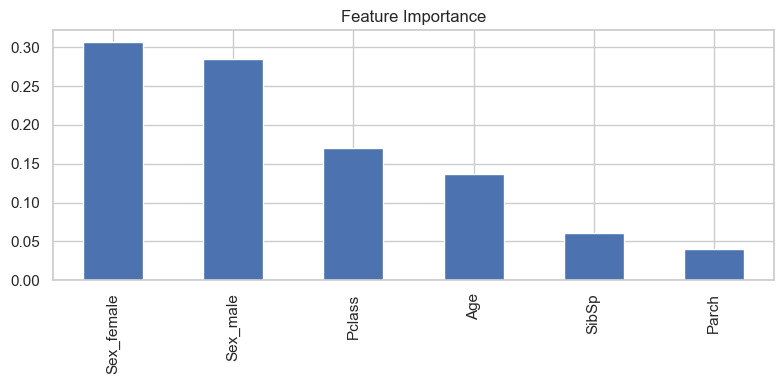

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Relationship between Family Size and Survival Rate

We can group 'SibSp' (siblings/spouses) and 'Parch' (parents/children) to understand the impact of having family on board.

In [57]:
# Bin SibSp into 'Alone' and 'With Family'
df['SibSp_grouped'] = df['SibSp'].apply(lambda x: 'Alone' if x == 0 else 'With Family')

# Bin Parch into 'Alone' and 'With Family'
df['Parch_grouped'] = df['Parch'].apply(lambda x: 'Alone' if x == 0 else 'With Family')

# Show the first few rows with the new columns
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,SibSp_grouped,Parch_grouped
0,1,0,3,male,22.0,1,0,7.25,Unknown,S,With Family,Alone
1,2,1,1,female,38.0,1,0,71.28,C85,C,With Family,Alone
2,3,1,3,female,26.0,0,0,7.92,Unknown,S,Alone,Alone
3,4,1,1,female,35.0,1,0,53.10,C123,S,With Family,Alone
4,5,0,3,male,35.0,0,0,8.05,B5,S,Alone,Alone


### Chi-Square Test for SibSp and Survival

We'll use a chi-square test to determine if there is a statistically significant relationship between the binned 'SibSp' (family size) and 'Survived' columns.

In [61]:
from scipy.stats import chi2_contingency

# Create a contingency table of SibSp_grouped and Survived
contingency_table_sibsp = pd.crosstab(df['SibSp_grouped'], df['Survived'])
print("Contingency Table (SibSp vs Survived):\n", contingency_table_sibsp)

# Perform the chi-square test
chi2_sibsp, p_sibsp, dof_sibsp, expected_sibsp = chi2_contingency(contingency_table_sibsp)

print(f"\nChi-square statistic (SibSp): {chi2_sibsp:.4e}")
print(f"P-value (SibSp): {p_sibsp:.4e}")
print(f"Degrees of freedom (SibSp): {dof_sibsp}")
print("Expected frequencies (SibSp):\n", expected_sibsp)

# Interpret the result
alpha = 0.05
print("\nInterpretation (SibSp):")
if p_sibsp < alpha:
    print("Reject the null hypothesis: There is a significant relationship between SibSp_grouped and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between SibSp_grouped and Survived.")

Contingency Table (SibSp vs Survived):
 Survived         0    1
SibSp_grouped          
Alone          398  210
With Family    151  132

Chi-square statistic (SibSp): 1.1456e+01
P-value (SibSp): 7.1278e-04
Degrees of freedom (SibSp): 1
Expected frequencies (SibSp):
 [[374.62626263 233.37373737]
 [174.37373737 108.62626263]]

Interpretation (SibSp):
Reject the null hypothesis: There is a significant relationship between SibSp_grouped and Survived.


### Chi-Square Test for Parch and Survival

Now, we'll perform the same test for the binned 'Parch' (family size) and 'Survived' columns.

In [62]:
# Create a contingency table of Parch_grouped and Survived
contingency_table_parch = pd.crosstab(df['Parch_grouped'], df['Survived'])
print("Contingency Table (Parch vs Survived):\n", contingency_table_parch)

# Perform the chi-square test
chi2_parch, p_parch, dof_parch, expected_parch = chi2_contingency(contingency_table_parch)

print(f"\nChi-square statistic (Parch): {chi2_parch:.4e}")
print(f"P-value (Parch): {p_parch:.4e}")
print(f"Degrees of freedom (Parch): {dof_parch}")
print("Expected frequencies (Parch):\n", expected_parch)

# Interpret the result
alpha = 0.05
print("\nInterpretation (Parch):")
if p_parch < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Parch_grouped and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Parch_grouped and Survived.")

Contingency Table (Parch vs Survived):
 Survived         0    1
Parch_grouped          
Alone          445  233
With Family    104  109

Chi-square statistic (Parch): 1.8656e+01
P-value (Parch): 1.5652e-05
Degrees of freedom (Parch): 1
Expected frequencies (Parch):
 [[417.75757576 260.24242424]
 [131.24242424  81.75757576]]

Interpretation (Parch):
Reject the null hypothesis: There is a significant relationship between Parch_grouped and Survived.


## Combine SibSp and Parch into Family Size and Analyze Relationship with Survival

We'll create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'. Then we can analyze its relationship with survival.

In [64]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Bin FamilySize into 'Alone' and 'With Family'
df['FamilySize_grouped'] = df['FamilySize'].apply(lambda x: 'Alone' if x == 0 else 'With Family')

# Show the first few rows with the new column
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,SibSp_grouped,Parch_grouped,FamilySize,FamilySize_grouped
0,1,0,3,male,22.0,1,0,7.25,Unknown,S,With Family,Alone,1,With Family
1,2,1,1,female,38.0,1,0,71.28,C85,C,With Family,Alone,1,With Family
2,3,1,3,female,26.0,0,0,7.92,Unknown,S,Alone,Alone,0,Alone
3,4,1,1,female,35.0,1,0,53.10,C123,S,With Family,Alone,1,With Family
4,5,0,3,male,35.0,0,0,8.05,B5,S,Alone,Alone,0,Alone


### Chi-Square Test for Family Size and Survival

We'll use a chi-square test to determine if there is a statistically significant relationship between the binned 'FamilySize' and 'Survived' columns.

In [65]:
from scipy.stats import chi2_contingency

# Create a contingency table of FamilySize_grouped and Survived
contingency_table_familysize = pd.crosstab(df['FamilySize_grouped'], df['Survived'])
print("Contingency Table (Family Size vs Survived):\n", contingency_table_familysize)

# Perform the chi-square test
chi2_familysize, p_familysize, dof_familysize, expected_familysize = chi2_contingency(contingency_table_familysize)

print(f"\nChi-square statistic (Family Size): {chi2_familysize:.4e}")
print(f"P-value (Family Size): {p_familysize:.4e}")
print(f"Degrees of freedom (Family Size): {dof_familysize}")
print("Expected frequencies (Family Size):\n", expected_familysize)

# Interpret the result
alpha = 0.05
print("\nInterpretation (Family Size):")
if p_familysize < alpha:
    print("Reject the null hypothesis: There is a significant relationship between FamilySize_grouped and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between FamilySize_grouped and Survived.")

Contingency Table (Family Size vs Survived):
 Survived              0    1
FamilySize_grouped          
Alone               374  163
With Family         175  179

Chi-square statistic (Family Size): 3.6001e+01
P-value (Family Size): 1.9727e-09
Degrees of freedom (Family Size): 1
Expected frequencies (Family Size):
 [[330.87878788 206.12121212]
 [218.12121212 135.87878788]]

Interpretation (Family Size):
Reject the null hypothesis: There is a significant relationship between FamilySize_grouped and Survived.
